## Decision tree for a cloth company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [55]:
company = pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [56]:
company.shape

(400, 11)

In [57]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [86]:
companydata = company.copy()

In [87]:
companydata['Sales'] = (companydata.Sales).astype('int')

In [88]:
## classifiying data to high sales and low sales depending on average of sales
companydata["salesrate"]=  "<=7"
companydata.loc[companydata["Sales"]>=8,"salesrate"]="high"
companydata.loc[companydata["Sales"]<=8,"salesrate"]="Low"
companydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salesrate
0,9,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [90]:
companydata.dtypes

Sales           int32
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
salesrate      object
dtype: object

In [91]:
## converting categorical data to numerical using Labelencoder
from sklearn import preprocessing
labelEncod = preprocessing.LabelEncoder()
for column_name in companydata.columns:
    if companydata[column_name].dtype == object:
        companydata[column_name] = labelEncod.fit_transform(companydata[column_name])
    else:
        pass

In [92]:
companydata= companydata.drop('Sales', axis = 1)

In [93]:
x = companydata.iloc[:,0:10]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [94]:
y = companydata.iloc[:,10]
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: salesrate, Length: 400, dtype: int32

In [95]:
colnames = list(companydata.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'salesrate']

In [140]:
## Splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

#### Building Decision tree classifier using Entropy criterion

In [141]:
## Building Decision tree classifier using Entropy criterion
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(387.5, 660.625, 'Price <= 96.5\nentropy = 0.865\nsamples = 320\nvalue = [228, 92]\nclass = highsales'),
 Text(193.75, 471.875, 'ShelveLoc <= 0.5\nentropy = 0.975\nsamples = 59\nvalue = [24, 35]\nclass = lowsales'),
 Text(96.875, 283.125, 'CompPrice <= 118.0\nentropy = 0.792\nsamples = 21\nvalue = [16, 5]\nclass = highsales'),
 Text(48.4375, 94.375, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = highsales'),
 Text(145.3125, 94.375, 'entropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = lowsales'),
 Text(290.625, 283.125, 'ShelveLoc <= 1.5\nentropy = 0.742\nsamples = 38\nvalue = [8, 30]\nclass = lowsales'),
 Text(242.1875, 94.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = lowsales'),
 Text(339.0625, 94.375, 'entropy = 0.904\nsamples = 25\nvalue = [8, 17]\nclass = lowsales'),
 Text(581.25, 471.875, 'Advertising <= 6.5\nentropy = 0.757\nsamples = 261\nvalue = [204, 57]\nclass = highsales'),
 Text(484.375, 283.125, 'ShelveLoc <= 1.5\nentropy = 0.357\nsamples = 133

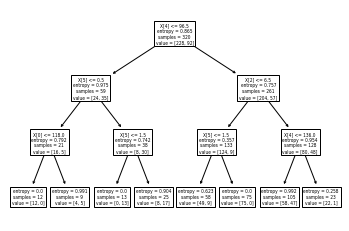

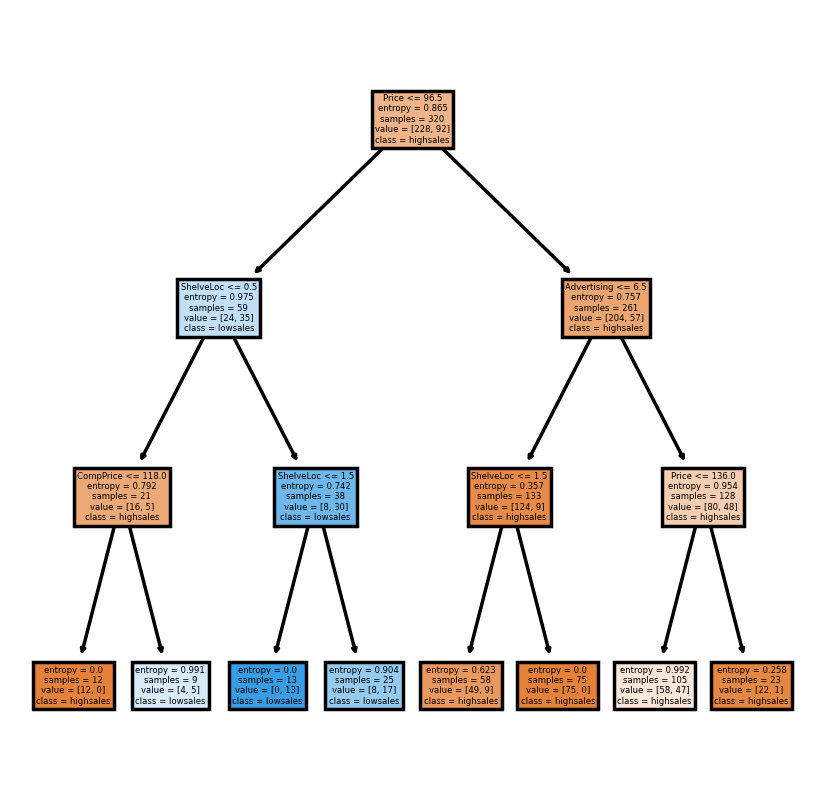

In [142]:
## plot the decision tree for our model 
tree.plot_tree(model)
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['highsales','lowsales']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi = 250)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True)

In [143]:
## Predicting on tree data
pred = model.predict(xtest)
pd.Series(pred).value_counts()

0    61
1    19
dtype: int64

In [144]:
pd.crosstab(ytest, pred)

col_0,0,1
salesrate,,
0,50,8
1,11,11


In [145]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        58
           1       0.58      0.50      0.54        22

    accuracy                           0.76        80
   macro avg       0.70      0.68      0.69        80
weighted avg       0.75      0.76      0.76        80



In [146]:
pred_tr = model.predict(xtrain)
print(classification_report(ytrain, pred_tr))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       228
           1       0.74      0.38      0.50        92

    accuracy                           0.78       320
   macro avg       0.77      0.66      0.68       320
weighted avg       0.78      0.78      0.76       320



#### Building Decision Tree classifier using Gini Index (CART)

In [159]:
model_gini = DecisionTreeClassifier(max_depth = 5,max_leaf_nodes = 5)  ## default criterion for decisiontree is giniindex
model_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)

In [160]:
## Predicting and computing accuracy
pred_gini = model_gini.predict(xtest)
print(classification_report(ytest, pred_gini))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        58
           1       0.61      0.50      0.55        22

    accuracy                           0.78        80
   macro avg       0.72      0.69      0.70        80
weighted avg       0.76      0.78      0.77        80



In [161]:
pred_tr = model_gini.predict(xtrain)
np.mean(pred_tr == ytrain)

0.78125

[Text(275.55555555555554, 528.5, 'Price <= 96.5\ngini = 0.41\nsamples = 320\nvalue = [228, 92]\nclass = highsales'),
 Text(137.77777777777777, 377.5, 'ShelveLoc <= 0.5\ngini = 0.483\nsamples = 59\nvalue = [24, 35]\nclass = lowsales'),
 Text(68.88888888888889, 226.5, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = highsales'),
 Text(206.66666666666666, 226.5, 'gini = 0.332\nsamples = 38\nvalue = [8, 30]\nclass = lowsales'),
 Text(413.3333333333333, 377.5, 'Advertising <= 6.5\ngini = 0.341\nsamples = 261\nvalue = [204, 57]\nclass = highsales'),
 Text(344.44444444444446, 226.5, 'gini = 0.126\nsamples = 133\nvalue = [124, 9]\nclass = highsales'),
 Text(482.2222222222222, 226.5, 'Price <= 136.0\ngini = 0.469\nsamples = 128\nvalue = [80, 48]\nclass = highsales'),
 Text(413.3333333333333, 75.5, 'gini = 0.495\nsamples = 105\nvalue = [58, 47]\nclass = highsales'),
 Text(551.1111111111111, 75.5, 'gini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = highsales')]

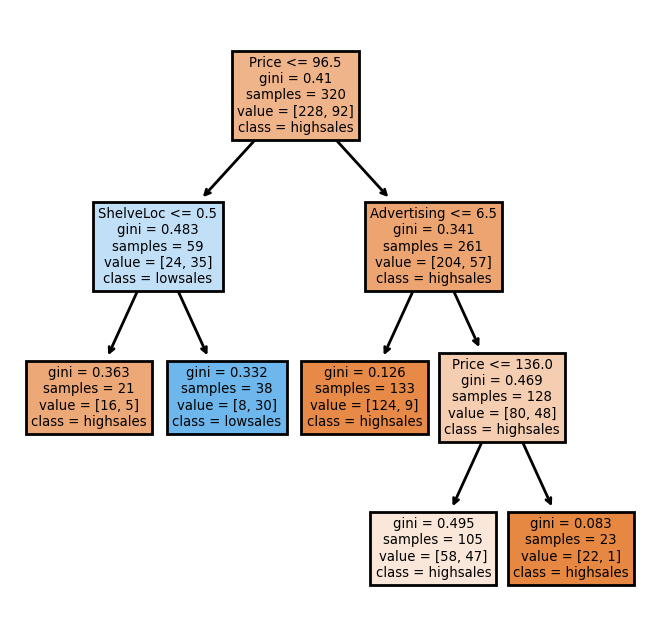

In [164]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['highsales','lowsales']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi = 200)
tree.plot_tree(model_gini, feature_names = fn, class_names = cn, filled = True)

In [163]:
## we are getting nearly same accuraries for both train and test using Entropy and GiniIndes methods
 